# Regressions

## Install

```
pip install scikit-learn
pip install patsy
```

## Data we have

wages: Hourly wage rate from all jobs.

education: 	Number of years of schooling.

age: Age in years.

genre: 	A factor with levels: Female, Male.

language: A factor with levels: English, French, Other.


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [66]:
# Let's read the data
df_data = pd.read_csv("SLID.csv")

df_data

In [68]:
# The data is incomplete
df_data.isnull().sum()

wages        3278
education     249
age             0
genre           0
language      121
dtype: int64

In [70]:
# Let's have 2 dataframe, one with with the wage, and one without it
df_edu = df_data[df_data.education.notnull() & df_data.language.notnull()]
df_wage = df_data[ df_data.wages.notnull() & df_data.education.notnull() & df_data.language.notnull()]

In [71]:
# Let's check we do not have null data for education and language
df_edu.isnull().sum()

wages        3138
education       0
age             0
genre           0
language        0
dtype: int64

In [72]:
df_wage.isnull().sum()

wages        0
education    0
age          0
genre        0
language     0
dtype: int64

### Lesson: Simple linear regression

https://online.stat.psu.edu/stat501/lesson/1

### Lesson: multiple linear regression

https://online.stat.psu.edu/stat501/lesson/5

We are not in math class.
To summarize, we are looking to have the cofficients of our linear expression (a function of x, x^2, x^3... for simple linear regression, for other dimension for muliple linear regression)

### Patsy

"It is a Python package for describing statistical models (especially linear models, or models that have a linear component) and building design matrices. It is closely inspired by and compatible with the formula mini-language used in R and S."

https://patsy.readthedocs.io/en/latest/overview.html

In [73]:
from patsy import dmatrices

## Simple linear regression

Let's see a simple linear regression, between wage and age.

We should expect that older people, will have a higher wage.

First let's write our simple regression formula:

```wage = coeff_age * age + intercept```

The intercept is a constant. The formula is like having the basic one degree formula: ```y = a*x + b```

Here in the patsy formula, we are going to remove the intercept (- 1) because it will be handle by scikit.

In [74]:

df_wage_age = dmatrices("wages ~ age - 1", df_wage, return_type='dataframe')


In [75]:
df_wage_age

(      wages
 0     10.56
 1     11.00
 3     17.76
 5     14.00
 8      8.20
 ...     ...
 7417   6.80
 7421  30.49
 7422  22.00
 7423  11.85
 7424  23.00
 
 [3987 rows x 1 columns],
        age
 0     40.0
 1     19.0
 3     46.0
 5     50.0
 8     31.0
 ...    ...
 7417  20.0
 7421  52.0
 7422  41.0
 7423  47.0
 7424  30.0
 
 [3987 rows x 1 columns])

In [76]:
len(df_wage_age)

2

In [77]:
df_wage_age[0],df_wage_age[1]

(      wages
 0     10.56
 1     11.00
 3     17.76
 5     14.00
 8      8.20
 ...     ...
 7417   6.80
 7421  30.49
 7422  22.00
 7423  11.85
 7424  23.00
 
 [3987 rows x 1 columns],
        age
 0     40.0
 1     19.0
 3     46.0
 5     50.0
 8     31.0
 ...    ...
 7417  20.0
 7421  52.0
 7422  41.0
 7423  47.0
 7424  30.0
 
 [3987 rows x 1 columns])

In [ ]:
# Let's write our linear regresion formula

### Let's write our linear regresion formula

In [78]:
# Let's fist separate the data, to have data for training
# and then data to test (here 20% of the data to test it)
x_train, x_test, y_train, y_test = train_test_split(
    df_wage_age[1], df_wage_age[0], test_size=0.20, random_state=42)

In [79]:
len(x_train), len(y_train), len(x_test), len(y_test)

(3189, 3189, 798, 798)

In [80]:
# We have a good size to train and test
# Let's perform our regression
model_wage_age = LinearRegression()
model_wage_age.fit(x_train, y_train)

LinearRegression()

In [81]:
dir(model_wage_age)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',

In [82]:
# r2 (coeffient of deteionmination) is not great, but this is because
# the data is too much scattered
# but we can see a tendancy
# we are going to increase our model to have a better r2
model_wage_age.score(x_train, y_train)

0.13279884804805087

In [83]:
# the coefficients of our linear regression (you see, no intercept here)
print(model_wage_age.coef_[0])
print(model_wage_age.intercept_)

[0.2383781]
[6.70335859]


In [84]:
# model is: wage = 0.2383781 * age + 6.70335859

In [85]:
df_wage_age[1].age


0       40.0
1       19.0
3       46.0
5       50.0
8       31.0
        ... 
7417    20.0
7421    52.0
7422    41.0
7423    47.0
7424    30.0
Name: age, Length: 3987, dtype: float64

In [86]:
x_train

,age
1031,41.0
1044,24.0
2941,37.0
1129,32.0
824,43.0
...,...
2071,19.0
2391,30.0
1587,39.0
6532,53.0


In [87]:
y_train

,wages
1031,15.65
1044,21.00
2941,8.00
1129,17.00
824,22.70
...,...
2071,6.50
2391,6.70
1587,13.48
6532,23.84


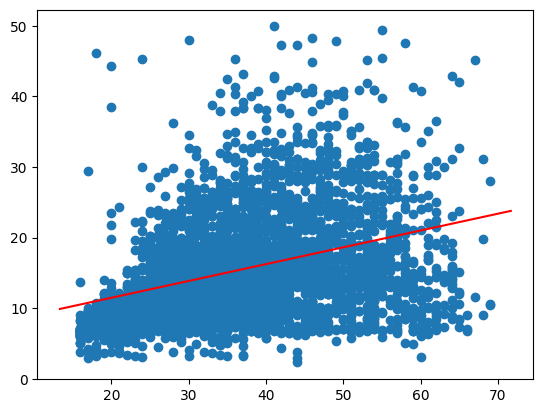

In [88]:
plt.scatter(x_train.age, y_train, label='wage age')
x_min, x_max = plt.xlim()
plt.plot([x_min, x_max],
         [model_wage_age.coef_[0][0]*x_min+ model_wage_age.intercept_[0],
          model_wage_age.coef_[0][0]*x_max+ model_wage_age.intercept_[0]],
          label="Linear regression", color="red")

In [89]:
# Then with the x_test, we can compare the result with the y_test
y_predict = model_wage_age.predict(x_test)

In [90]:
mean_squared_error(y_test, y_predict)

51.47712022756472

In [91]:
# We should have a r2 similar from what we found earlier
r2_score(y_test, y_predict)

0.11375418772512313

In [92]:
# Let's do another one easy.
# wage in function of genre
# Unfortunatly, based on the data we have we expect that women earn less than men
# This time the column genre is not a number, but a string
# So it is going to be considered like a categorial data
df_wage_genre = dmatrices("wages ~ C(genre) - 1", df_wage, return_type='dataframe')
x_train, x_test, y_train, y_test = train_test_split(
    df_wage_genre[1], df_wage_genre[0], test_size=0.20, random_state=42)
model_wage_genre = LinearRegression()
model_wage_genre.fit(x_train, y_train)
print('score', model_wage_genre.score(x_train, y_train)) # R2 -  Remeber R2 should be close to 1 to have a perfect model
print('coeff', model_wage_genre.coef_[0])
print('intercept', model_wage_genre.intercept_[0])

score 0.044135361701107545
coeff [-1.66556227  1.66556227]
intercept 15.545237475554478


In [ ]:
# male => wage = 15.54 + 1.66556227 * 1
# women => wage = 15.54 - 1.66556227 * 1

In [ ]:
# Based on this data, men are earning more than women.

In [93]:
# Check how is the x_train
# it takes all the string values in columns, and put 1 for the
# corresponding column. When you have more than 2 columns
# patsy will remove the column for one value of the categorical values
# For the value removed, patsy will put 0 for all the columns.
x_train

,C(genre)[Female],C(genre)[Male]
1031,0.0,1.0
1044,1.0,0.0
2941,1.0,0.0
1129,1.0,0.0
824,0.0,1.0
...,...,...
2071,1.0,0.0
2391,1.0,0.0
1587,1.0,0.0
6532,0.0,1.0


In [61]:
y_train[x_train.iloc[:, 1] == 1].wages   # men


1031    15.65
824     22.70
3272    12.00
1377    16.67
7063    14.03
        ...  
5765    13.00
7006    12.15
2005    21.60
6532    23.84
5917     9.00
Name: wages, Length: 1588, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8741bda1e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8741bda7e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8741bd9f40>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8741bdae10>,
 'fliers': [],
 'means': []}

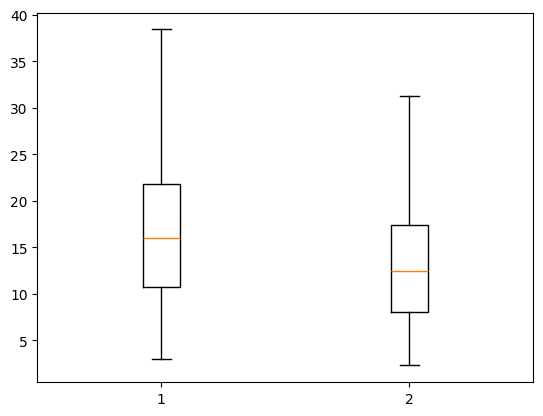

In [94]:
plt.boxplot([y_train[x_train.iloc[:, 1] == 1].wages, # men
             y_train[x_train.iloc[:, 0] == 1].wages], # women
             0, '')

In [95]:
model_wage_genre.predict(x_test)

array([[17.21079975],
       [13.8796752 ],
       [17.21079975],
       [13.8796752 ],
       [17.21079975],
       [13.8796752 ],
       [13.8796752 ],
       [13.8796752 ],
       [13.8796752 ],
       [13.8796752 ],
       [13.8796752 ],
       [13.8796752 ],
       [17.21079975],
       [17.21079975],
       [17.21079975],
       [17.21079975],
       [13.8796752 ],
       [13.8796752 ],
       [17.21079975],
       [13.8796752 ],
       [17.21079975],
       [13.8796752 ],
       [13.8796752 ],
       [17.21079975],
       [17.21079975],
       [17.21079975],
       [13.8796752 ],
       [17.21079975],
       [13.8796752 ],
       [17.21079975],
       [13.8796752 ],
       [13.8796752 ],
       [13.8796752 ],
       [17.21079975],
       [13.8796752 ],
       [17.21079975],
       [17.21079975],
       [13.8796752 ],
       [13.8796752 ],
       [17.21079975],
       [13.8796752 ],
       [13.8796752 ],
       [17.21079975],
       [13.8796752 ],
       [13.8796752 ],
       [13

In [96]:
# We have done 1 simple linear regression
# and another simple linear regression with categorical value
# r2 score was not great, data is too scattered
# earning value depend of more than one variable
# Let's use this 2 data sets to improve the score
# Of course after we are going to use the education variable
# which is going to improve a lot more the score
# but for the moment let's try to improve the score with just
# combining age and genre.
# Now we are going to use operators on our model
# https://patsy.readthedocs.io/en/latest/formulas.html#operators
# and this can get complicated.
# + operator is going to do a set union (a + a will be just a)
# - => set difference
# : (a+b):(c+d) => a:c + a:d + b:c + b:d ; (a:b):(a:c) => a:b:c
# * a * b => a + b + a:b, this is the way to go if you want to
# include all the interaction

In [97]:
df_wage_genre = dmatrices("wages ~ age*C(genre) - 1", df_wage, return_type='dataframe')
x_train, x_test, y_train, y_test = train_test_split(
    df_wage_genre[1], df_wage_genre[0], test_size=0.20, random_state=42)
model_wage_genre = LinearRegression()
model_wage_genre.fit(x_train, y_train)
print('score', model_wage_genre.score(x_train, y_train))
print('coeff', model_wage_genre.coef_[0])
print('intercept', model_wage_genre.intercept_[0])

score 0.18550377545191898
coeff [ 0.73012339 -0.73012339  0.17227332  0.12822276]
intercept 6.778666980758073


In [98]:
x_train
# first line, wage predict => 6.7786 + 0.0 * 0.7301339 + 1 * -0.73012339 + 41 * 0.1722732 + 41 * 0.12226

,C(genre)[Female],C(genre)[Male],age,age:C(genre)[T.Male]
1031,0.0,1.0,41.0,41.0
1044,1.0,0.0,24.0,0.0
2941,1.0,0.0,37.0,0.0
1129,1.0,0.0,32.0,0.0
824,0.0,1.0,43.0,43.0
...,...,...,...,...
2071,1.0,0.0,19.0,0.0
2391,1.0,0.0,30.0,0.0
1587,1.0,0.0,39.0,0.0
6532,0.0,1.0,53.0,53.0


**Exercise:** You can make the chart for the male data and one for the female data with the last modelisation.